<a href="https://colab.research.google.com/github/KOWilliams/KOWilliams/blob/main/Fruits_Dataset_for_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
# The command pip install kaggle
# is used to install the Kaggle Python package using the pip package manager

In [ ]:
from google.colab import files
files.upload()
# This line of code is used to upload files from
# the local machine to the Colab environment.

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kehindeoluwaseun","key":"34b8688e556df9e46dd1bf0ae96b6056"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# The set of code above are used to set up the Kaggle API key on my computer.
# The purpose of these commands is to create a directory named .kaggle
# in the home directory, we move the Kaggle API key file (kaggle.json) into
# that directory, and set the appropriate permissions to ensure that only
# the owner has read and write access to the API key file.
# This is done for security reasons to protect your Kaggle API credentials
# from unauthorized access. The Kaggle API key is used to authenticate and
# interact with the Kaggle platform programmatically.

In [ ]:
!kaggle datasets download -d alihasnainch/fruits-dataset-for-classification

 35% 5.00M/14.5M [00:00<00:00, 45.2MB/s]
100% 14.5M/14.5M [00:00<00:00, 103MB/s] 


In [ ]:
!unzip fruits-dataset-for-classification -d fruits-dataset-for-classification

Archive:  fruits-dataset-for-classification.zip
  inflating: fruits-dataset-for-classification/fresh_peaches_done/fresh_peach_1.jpg  
  inflating: fruits-dataset-for-classification/fresh_peaches_done/fresh_peach_10.jpg  
  inflating: fruits-dataset-for-classification/fresh_peaches_done/fresh_peach_100.jpg  
  inflating: fruits-dataset-for-classification/fresh_peaches_done/fresh_peach_101.jpg  
  inflating: fruits-dataset-for-classification/fresh_peaches_done/fresh_peach_102.jpg  
  inflating: fruits-dataset-for-classification/fresh_peaches_done/fresh_peach_103.jpg  
  inflating: fruits-dataset-for-classification/fresh_peaches_done/fresh_peach_104.jpg  
  inflating: fruits-dataset-for-classification/fresh_peaches_done/fresh_peach_105.jpg  
  inflating: fruits-dataset-for-classification/fresh_peaches_done/fresh_peach_106.jpg  
  inflating: fruits-dataset-for-classification/fresh_peaches_done/fresh_peach_107.jpg  
  inflating: fruits-dataset-for-classification/fresh_peaches_done/fresh_pea

In [ ]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
import os
# the code imports essential libraries for data analysis (pandas, numpy),
# file and directory manipulation (glob, os), and image processing (cv2).
# These libraries are commonly used in tasks related to data science,
# machine learning, and computer vision.
# Definition of the paths to the rice-leafs-500px-dataset image folders (BrownSpot, Healthy, Hispa, LeafBlast and NeckBlast)
fresh_peaches_done_folder = '/content/fruits-dataset-for-classification/fresh_peaches_done'
fresh_pomegranates_done_folder = '/content/fruits-dataset-for-classification/fresh_pomegranates_done'
fresh_strawberries_done_folder = '/content/fruits-dataset-for-classification/fresh_strawberries_done'
rotten_peaches_done_folder = '/content/fruits-dataset-for-classification/rotten_peaches_done'
rotten_pomegranates_done_folder = '/content/fruits-dataset-for-classification/rotten_pomegranates_done'
rotten_strawberries_done_folder = '/content/fruits-dataset-for-classification/rotten_strawberries_done'
# We are initializing the lists to store images and labels
images = []
labels = []
# We Load and pre-process Fruits Dataset for Classification Dataset images (Brown Spot)
for filename in os.listdir(fresh_peaches_done_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(fresh_peaches_done_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(0)  # 0 represents Fresh Peaches Done
# We Load and pre-process Fruits Dataset for Classification Dataset images (Healthy)
for filename in os.listdir(fresh_pomegranates_done_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(fresh_pomegranates_done_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(1)  # 1 represents Fresh Pomegranates Done
# We Load and pre-process Fruits Dataset for Classification Dataset images (Hispa)
for filename in os.listdir(fresh_strawberries_done_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(fresh_strawberries_done_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(2)  # 2 represents Fresh Strawberries Done
# We Load and pre-process Fruits Dataset for Classification Dataset images (Leaf Blast)
for filename in os.listdir(rotten_peaches_done_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(rotten_peaches_done_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(3)  # 3 represents Rotten Peaches Done
# We Load and pre-process Fruits Dataset for Classification Dataset images (Hispa)
for filename in os.listdir(rotten_pomegranates_done_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(rotten_pomegranates_done_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(4)  # 4 represents Rotten Pomegranates Done
# We Load and pre-process Fruits Dataset for Classification Dataset images (Leaf Blast)
for filename in os.listdir(rotten_strawberries_done_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(rotten_strawberries_done_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(5)  # 5 represents Rotten Strawberries Done
# We Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split

# We are Spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Assuming we have already loaded and pre-processed data
# (x_train, y_train, x_test, y_test)

# Definition of the model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')  # 6 classes: Fresh Peaches, Fresh Pomegranates, Fresh Strawberries, Rotten Peaches, Rotten Pomegranates and Rotten Strawberries
])

# Compilation of the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training of the model
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/30
42/42 [==============================] - 30s 676ms/step - loss: 210.8032 - accuracy: 0.2107 - val_loss: 1.8555 - val_accuracy: 0.2024
Epoch 2/30
42/42 [==============================] - 28s 662ms/step - loss: 1.7176 - accuracy: 0.3029 - val_loss: 1.8168 - val_accuracy: 0.2598
Epoch 3/30
42/42 [==============================] - 29s 675ms/step - loss: 1.6117 - accuracy: 0.3799 - val_loss: 1.8042 - val_accuracy: 0.3112
Epoch 4/30
42/42 [==============================] - 28s 672ms/step - loss: 1.2819 - accuracy: 0.5378 - val_loss: 1.8681 - val_accuracy: 0.2931
Epoch 5/30
42/42 [==============================] - 29s 682ms/step - loss: 1.1576 - accuracy: 0.5937 - val_loss: 2.1850 - val_accuracy: 0.3112
Epoch 6/30
42/42 [==============================] - 28s 676ms/step - loss: 0.7727 - accuracy: 0.7462 - val_loss: 2.5579 - val_accuracy: 0.3051
Epoch 7/30
42/42 [==============================] - 28s 667ms/step - loss: 0.5228 - accuracy: 0.8255 - val_loss: 2.8874 - val_accuracy: 0.32

In [ ]:
# Predicting on a single image
sample_image = x_test[3]  # Here we replace with our image data
predictions = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(predictions)
# Here we interpret the label using our dataset's class labels (0 Fresh Peaches, 1 Fresh Pomegranates, 2 Fresh Strawberries, 3 Rotten Peaches, 4 Rotten Pomegranates, 5 Rotten Strawberries)
class_labels = 'Fresh Peaches', 'Fresh Pomegranates', 'Fresh Strawberries', 'Rotten Peaches', 'Rotten Pomegranates','Rotten Strawberries'
predicted_class = class_labels[predicted_label]
print(f'Predicted class: {predicted_class}')

1/1 [==============================] - 0s 28ms/step
Predicted class: Rotten Pomegranates


In [ ]:
# Predicting on a single image
sample_image = x_test[3]  # Here we replace with our image data
predictions = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(predictions)

1/1 [==============================] - 0s 26ms/step


In [ ]:
from google.colab import files
files.upload()
# This line of code is used to upload files from
# the local machine to the Colab environment.

Saving fresh_strawberry_1.jpg to fresh_strawberry_1.jpg


{'fresh_strawberry_1.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\x08\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01,\x01,\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\x

In [ ]:
# we test the model with a new photo from the internet.
# we know already that this new image is a Rotten Peaches image.
from PIL import Image
import numpy as np

# Load the new image
new_image_path = '/content/fruits-dataset-for-classification/fresh_pomegranates_done/fresh_pomegranate_100.jpg'
# Replace with the actual path to your new image
new_image = Image.open(new_image_path)

# Resize the image to match the input size expected by your model
input_size = (128, 128)  # Adjust this size based on your model's input size
new_image = new_image.resize(input_size)

# Convert the PIL image to a NumPy array
new_image_array = np.array(new_image)

# Normalize the image pixel values (if needed)
new_image_array = new_image_array / 255.0

# Making predictions on the new image
predictions = model.predict(np.expand_dims(new_image_array, axis=0))
predicted_label = np.argmax(predictions)

# Interpret the label using your dataset's class labels
class_labels = ['Fresh Peaches', 'Fresh Pomegranates', 'Fresh Strawberries', 'Rotten Peaches', 'Rotten Pomegranates','Rotten Strawberries']
predicted_class = class_labels[predicted_label]
print(f'Predicted class: {predicted_class}')

# Close the image
new_image.close()

1/1 [==============================] - 0s 25ms/step
Predicted class: Rotten Peaches


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 64)                3

11/11 [==============================] - 3s 255ms/step


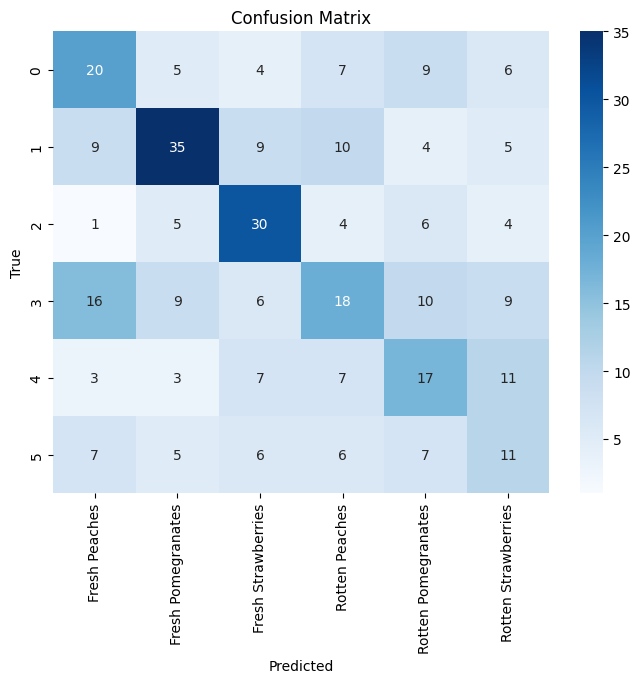

                     precision    recall  f1-score   support

      Fresh Peaches       0.36      0.39      0.37        51
 Fresh Pomegranates       0.56      0.49      0.52        72
 Fresh Strawberries       0.48      0.60      0.54        50
     Rotten Peaches       0.35      0.26      0.30        68
Rotten Pomegranates       0.32      0.35      0.34        48
Rotten Strawberries       0.24      0.26      0.25        42

           accuracy                           0.40       331
          macro avg       0.39      0.39      0.39       331
       weighted avg       0.40      0.40      0.39       331



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'predicted_labels' are the model's predicted labels for the test set
# 'y_test' contains the true labels of the test set

# Convert one-hot encoded predictions to class labels
predicted_labels = model.predict(x_test)
predicted_labels = tf.argmax(predicted_labels, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fresh Peaches', 'Fresh Pomegranates', 'Fresh Strawberries', 'Rotten Peaches', 'Rotten Pomegranates','Rotten Strawberries'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
class_report = classification_report(y_test, predicted_labels, target_names=['Fresh Peaches', 'Fresh Pomegranates', 'Fresh Strawberries', 'Rotten Peaches', 'Rotten Pomegranates','Rotten Strawberries'])
print(class_report)